In [2]:
import uproot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import timeit
import copy
import torch

plt.style.use('niceplots')

In [89]:
# read input hdf5

inputfile = '/nfs/dust/belle2/user/ferber/github-ECLML/test/inference-summary.hdf5'

h5f = h5py.File(inputfile,'r')
p_sum = h5f['p_sum'][:]
t_sum = h5f['t_sum'][:]
r_sum = h5f['r_sum'][:]
mon_E0 = h5f['mon_E0'][:]
mon_E1 = h5f['mon_E1'][:]
mon_theta0 = h5f['mon_theta0'][:]
mon_theta1 = h5f['mon_theta1'][:]
mon_angle = h5f['mon_angle'][:]
mon_nshared = h5f['mon_nshared'][:]
swap = h5f['swap'][:]

h5f.close()



In [90]:
len(swap[swap>0])/len(swap)

0.015608773724047818

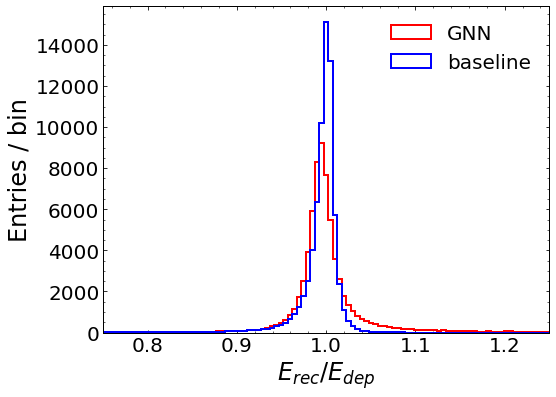

In [91]:
t = t_sum[:,0][mon_theta0>2.1]
p = p_sum[:,0][mon_theta0>2.1]
r = r_sum[:,0][mon_theta0>2.1]

xrange=[0.75, 1.25]
bins=np.linspace(xrange[0], xrange[1], 100)
_=plt.hist(p/t, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='GNN')
_=plt.hist(r/t, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)


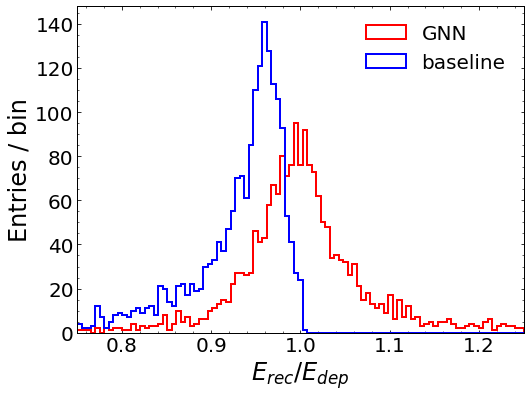

In [95]:
t = t_sum[:,0][mon_nshared>9]
p = p_sum[:,0][mon_nshared>9]
r = r_sum[:,0][mon_nshared>9]

xrange=[0.75, 1.25]
bins=np.linspace(xrange[0], xrange[1], 100)
_=plt.hist(p/t, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='GNN')
_=plt.hist(r/t, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)


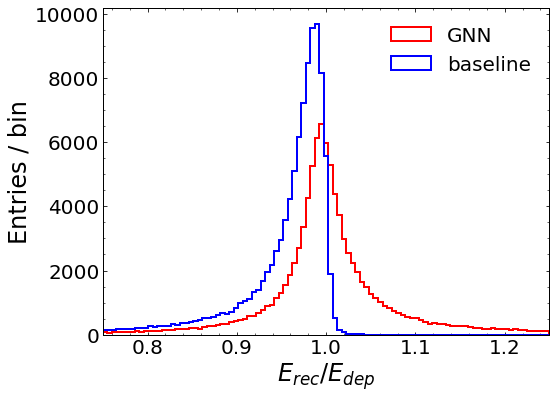

In [93]:
t = t_sum[:,0][mon_angle<0.075]
p = p_sum[:,0][mon_angle<0.075]
r = r_sum[:,0][mon_angle<0.075]

xrange=[0.75, 1.25]
bins=np.linspace(xrange[0], xrange[1], 100)
_=plt.hist(p/t, bins=bins, histtype='step', linewidth=2, edgecolor='red', label='GNN')
_=plt.hist(r/t, bins=bins, histtype='step', linewidth=2, edgecolor='blue', label='baseline')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)


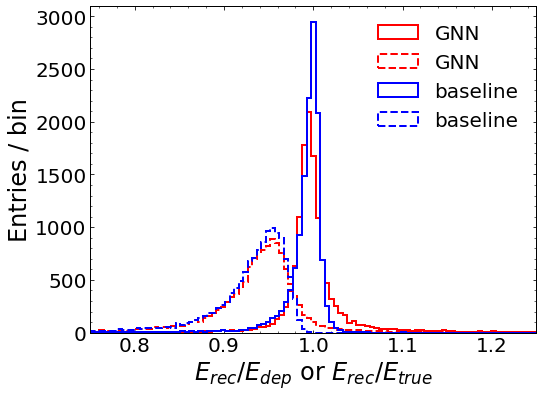

In [83]:
xrange=[0.75, 1.25]
bins=np.linspace(xrange[0], xrange[1], 100)
_=plt.hist(p_sum[:,0]/t_sum[:,0], bins=bins, histtype='step', linewidth=2, edgecolor='red', label='GNN')
_=plt.hist(p_sum[:,0]/mon_E0, bins=bins, histtype='step', ls='--', linewidth=2, edgecolor='red', label='GNN')
_=plt.hist(r_sum[:,0]/t_sum[:,0], bins=bins, histtype='step', linewidth=2, edgecolor='b', label='baseline')
_=plt.hist(r_sum[:,0]/mon_E0, bins=bins, histtype='step', ls='--', linewidth=2, edgecolor='b', label='baseline')
plt.gca().set_xlabel(r'$E_{rec}/E_{dep}$ or $E_{rec}/E_{true}$')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend()
_=plt.gca().set_xlim(xrange)
